# 16. Analysis of Yaquina Bay Data in the Time Domain

Here we will use some of the techniques of timeseries analysis in the time domain discussed in class.

The cell below uses [pandas](https://pandas.pydata.org/docs/index.html) to read the data file, replace NaNs and interpolate to fill missing data.

Typically, before you can even start plotting and analyzing data, a lot of data wrangling is needed to bring the data in a format that is usable. A lot of this has already been done for you by putting the data into one file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the ASCII file into a pandas DataFrame
file_path = "/data/OC515/data/lobo.ascii"  # original data includes missing values and outliers
column_names = ["time", "year", "month", "day", "hour", "minute", "second", "temp", "cond", "salt", "nitr", "turb", "flou", "river", "seal"]
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# Replace "1e35" with NaN for easier handling
df.replace(1.E+35, np.nan, inplace=True)

# Interpolate missing values using linear interpolation
df.interpolate(method='linear', axis=0, inplace=True)

# Time relative to Nov 11, 2007
df['time_relative'] = (df['time'] - df['time'].iloc[0])

In [2]:
# checkout dataframe
df

,time,year,month,day,hour,minute,second,temp,cond,salt,nitr,turb,flou,river,seal,time_relative
0,733347.6250,2007,11,1,15,0,0.00000,10.52,3.61,32.51,29.1,2.00,0.70,1.01,0.15,0.0000
1,733347.6667,2007,11,1,16,0,0.00000,10.50,3.61,32.51,27.6,2.43,0.74,1.01,0.39,0.0417
2,733347.7083,2007,11,1,17,0,0.00000,10.42,3.61,32.63,26.5,2.54,0.81,1.00,0.57,0.0833
3,733347.7500,2007,11,1,18,0,0.00000,10.37,3.62,32.77,25.8,1.87,0.80,1.00,0.62,0.1250
4,733347.7917,2007,11,1,19,0,0.00000,10.36,3.63,32.81,25.1,2.09,0.81,1.00,0.48,0.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,734335.2500,2010,7,16,6,0,0.00000,8.55,3.53,33.53,25.1,2.88,1.58,2.20,0.68,987.6250
23704,734335.2917,2010,7,16,7,0,0.00000,9.35,3.58,33.27,21.8,2.47,1.37,2.20,0.68,987.6667
23705,734335.3333,2010,7,16,7,59,59.99999,10.33,3.63,32.89,17.5,2.41,1.27,2.20,0.68,987.7083
23706,734335.3750,2010,7,16,9,0,0.00000,10.12,3.62,32.99,18.9,1.95,1.13,2.20,0.68,987.7500


In [3]:
df['seal'].iloc[23328:23707]

23328    0.47
23329    0.68
23330    0.68
23331    0.68
23332    0.68
         ... 
23702    0.68
23703    0.68
23704    0.68
23705    0.68
23706    0.68
Name: seal, Length: 379, dtype: float64

Sea level data after index = 23328 are all 0.68. Looks like a bug. Cut.

In [4]:
df = df.iloc[0:23329]
df

,time,year,month,day,hour,minute,second,temp,cond,salt,nitr,turb,flou,river,seal,time_relative
0,733347.6250,2007,11,1,15,0,0.00000,10.52,3.61,32.51,29.1,2.00,0.70,1.01,0.15,0.0000
1,733347.6667,2007,11,1,16,0,0.00000,10.50,3.61,32.51,27.6,2.43,0.74,1.01,0.39,0.0417
2,733347.7083,2007,11,1,17,0,0.00000,10.42,3.61,32.63,26.5,2.54,0.81,1.00,0.57,0.0833
3,733347.7500,2007,11,1,18,0,0.00000,10.37,3.62,32.77,25.8,1.87,0.80,1.00,0.62,0.1250
4,733347.7917,2007,11,1,19,0,0.00000,10.36,3.63,32.81,25.1,2.09,0.81,1.00,0.48,0.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23324,734319.4583,2010,6,30,10,59,59.99999,13.12,3.49,29.17,12.7,2.31,1.41,3.33,-1.29,971.8333
23325,734319.5000,2010,6,30,12,0,0.00000,13.29,3.49,29.06,12.3,1.71,2.17,3.33,-0.88,971.8750
23326,734319.5417,2010,6,30,13,0,0.00000,12.08,3.57,30.81,14.2,1.83,1.61,3.32,-0.40,971.9167
23327,734319.5833,2010,6,30,13,59,59.99999,11.11,3.59,31.77,17.4,1.57,1.72,3.32,0.08,971.9583


## 15.1. Plot the Data

The first and most important step is simply to plot the data and look at them. Below is a simple plot of salinity. Feel free to improve the figure and add panels for sea level, river runoff and one other variable of choice. Also, include axis labels, units and overlay curves (using a different color) for 3-day low-pass filtered data.

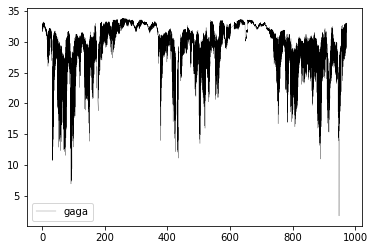

In [15]:
plt.plot(df['time_relative'],df['salt'], color='black', linewidth=0.2, label='gaga')
plt.legend()
plt.show()

## 15.2. Describe and Discuss
Add a markdown cell to describe and discuss your figures.

## 15.3. Basic Statistics
[Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) has built-in functions to calculate basic statistics such as the minimum, maximum, mean, median, and standard deviation. List those for your four variables.

## 15.4. Histograms
Plot histograms of your 4 variables. Which of your variables are approximately Gaussian distributed, which not? Why do you think they are/are not Gaussian distributed?

Looks like only temperature is Gaussian distributed. Distributions for both river runoff and salinity are highly asymmetric, with their mode in the lowest/highest bin, respectively. Sea level looks more Gaussian, but is still asymmetric and broader than a Gaussian.

## 15.5. 120-Day Subset 
Create a 120-day subset of data, ranging from day 780 to day 900. Repeat the analysis above (15.1.-15.4.) for the subset. For the histogram plots, try to plot them together in one panel by normalizing the data. Discuss if the subset is statistically similar or different from the full dataset.

## 15.6. Autocorrelation
Plot lag autocorrelation figures of your four variables for the 120-day subset.